# KNN: Cancer Classification 
This project uses a KNN classifier to predict if a patient has breast cancer. 

NOTE: This project is based on Codecademy's [KNN project](https://www.codecademy.com/journeys/data-scientist-ml/paths/dsmlcj-22-machine-learning-i/tracks/dsmlcj-22-supervised-learning-i/modules/mle-k-nearest-neighbors-e187011d-38bf-4df9-9ef2-6675fa0da752-046f6493-ceeb-4a43-b2de-dff3dd50b8d0/projects/knn-project). 

## Dataset
The dataset is from `sklearn`: breast_cancer. 

## Setup and Import

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from mlxtend.plotting import plot_decision_regions

In [47]:
breast_cancer_data = load_breast_cancer()

## Analyze Data

In [48]:
print("The feature names are: \n", breast_cancer_data.feature_names)

The feature names are: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [49]:
print("The targets are: ")
for id, name in enumerate(breast_cancer_data.target_names):
    print(id, "-", name)

The targets are: 
0 - malignant
1 - benign


In [50]:
# print a row of data and its target
ind = 0
print("A row of data looks like: \n", breast_cancer_data.data[ind])
print("The target for the row is: ", breast_cancer_data.target[ind])

A row of data looks like: 
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
The target for the row is:  0


In [51]:
# put data into a dataframe to look at some descriptive statistics
df= pd.DataFrame(data= np.c_[breast_cancer_data.data, breast_cancer_data.target], columns=list(breast_cancer_data.feature_names) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [53]:
# look at feature statistics, grouped by target
df.groupby(['target']).agg(['median', "std"])

mean radius           mean texture           mean perimeter             \
            median       std       median       std         median        std   
target                                                                          
0.0         17.325  3.203971        21.46  3.779470         114.20  21.854653   
1.0         12.200  1.780512        17.39  3.995125          78.18  11.807438   

       mean area             mean smoothness            ... worst compactness  \
          median         std          median       std  ...            median   
target                                                  ...                     
0.0        932.0  367.937978         0.10220  0.012608  ...           0.35635   
1.0        458.4  134.287118         0.09076  0.013446  ...           0.16980   

                 worst concavity           worst concave points            \
             std          median       std               median       std   
target                                                                      
0.0     0.170372          0.4049  0.181507              0.18200  0.046308   
1.0     0.092180          0.1412  0.140368              0.07431  0.035797   

       worst symmetry           worst fractal dimension            
               median       std                  median       std  
target                                                             
0.0            0.3103  0.074685                 0.08760  0.021553  
1.0            0.2687  0.041745                 0.07712  0.013804  

[2 rows x 60 columns]

Based on this brief exploration, we understand the following:
* There are 569 observations
* There are 30 features
* The target is binary (0 - malignant, 1 - benign)
* When grouping features by the target, we start to see some differences in group medians and standard deviations which gives confidence to being able to distinguish groups

## KNN Classifier
The KNN classifier model is trained; by default, k=3 is used. This hyperparameter is later tuned to find the value which results in the highest testing score. 

In [54]:
# split into training and testing set
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)


In [55]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_data, training_labels)

print(f"Testing score: {classifier.score(validation_data, validation_labels):.3f}")

Testing score: 0.947


### Hyperparameter tuning: k

In [56]:
accuracies = []
best_accuracy = 0
best_k = 200

for k in range(1, 101):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(training_data, training_labels)
  score = classifier.score(validation_data, validation_labels)
  accuracies.append(score)

  if score > best_accuracy:
    best_accuracy = score
    best_k = k

print(f"Based on hyperparameter tuning, the best test score of {best_accuracy:.4f} occurs at k={best_k}")
  

Based on hyperparameter tuning, the best test score of 0.9649 occurs at k=23


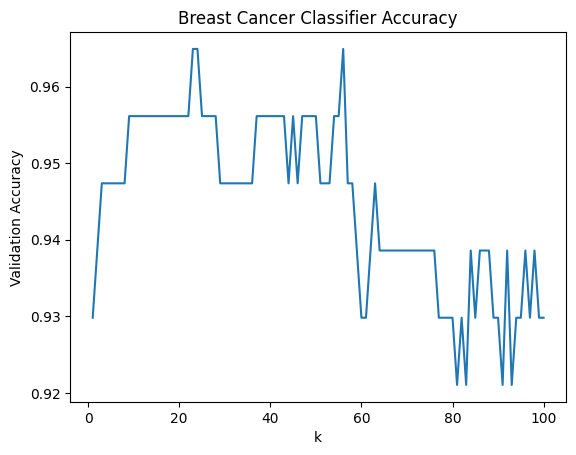

In [57]:
k_list = list(range(1, 101))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

The best test score occurs at k=23. There is another strong model with k~52, but this model is unnecessarily complex compared to one with k=23. 